In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Rtab
rtab = pd.read_csv("gene_presence_absence.Rtab", sep="\t")

# Extract and binarize matrix
matrix = rtab.iloc[:, 1:]
matrix = (matrix > 0).astype(int)
matrix.index = rtab.iloc[:, 0]

n_genomes = matrix.shape[1]

# Calculate frequency
gene_counts = matrix.sum(axis=1)
gene_freq = gene_counts / n_genomes

structure_df = pd.DataFrame({
    "gene_id": matrix.index,
    "count": gene_counts.values,
    "frequency": gene_freq.values
})


In [3]:
def assign_compartment(freq):
    if freq >= 0.99:
        return "Core"
    elif freq >= 0.95:
        return "Soft-core"
    elif freq >= 0.15:
        return "Shell"
    else:
        return "Cloud"

structure_df["compartment"] = structure_df["frequency"].apply(assign_compartment)

print(structure_df["compartment"].value_counts())


compartment
Cloud        3086
Core         1991
Shell        1205
Soft-core      79
Name: count, dtype: int64


In [10]:
colors = {
    "Core": "#003366",        # deep navy
    "Soft-core": "#00b4d8",   # bright cyan
    "Shell": "#f77f00",       # strong orange
    "Cloud": "#6c757d"        # neutral grey
}


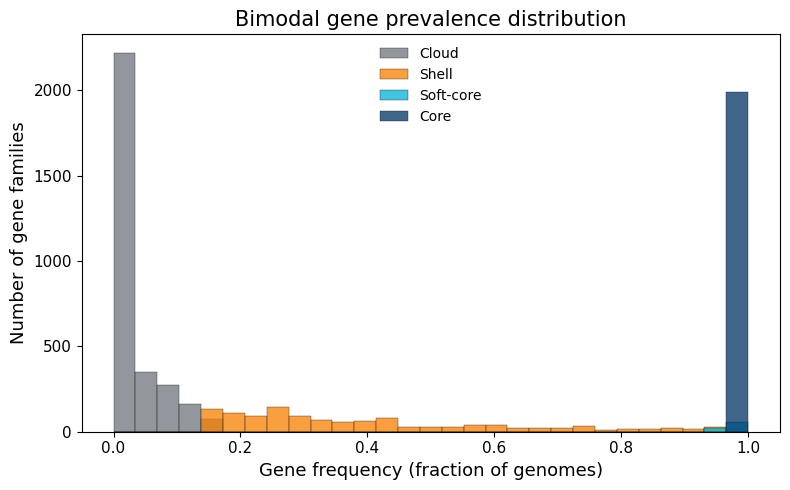

In [16]:
plt.figure(figsize=(8,5))

bins = np.linspace(0, 1, 30)

for compartment in ["Cloud", "Shell", "Soft-core", "Core"]:
    subset = structure_df[structure_df["compartment"] == compartment]
    
    plt.hist(
        subset["frequency"],
        bins=bins,
        alpha=0.75,
        label=compartment,
        color=colors[compartment],
        edgecolor="black",
        linewidth=0.3
    )

plt.xlabel("Gene frequency (fraction of genomes)", fontsize=13)
plt.ylabel("Number of gene families", fontsize=13)
plt.title("Bimodal gene prevalence distribution", fontsize=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.legend(frameon=False)
plt.tight_layout()

plt.savefig("Figure_4_Bimodal_prevalence.png", dpi=300, bbox_inches="tight")
plt.savefig("Figure_4_Bimodal_prevalence.pdf", bbox_inches="tight")

plt.show()


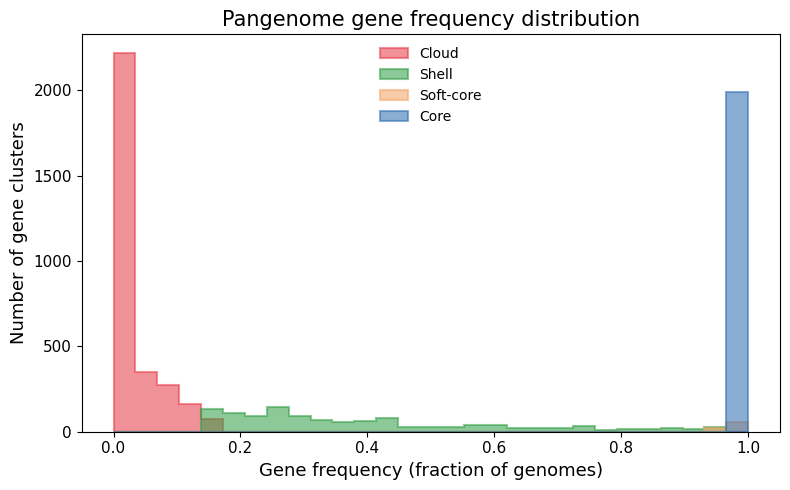

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Refined color palette
colors = {
    "Core": "#2b6cb0",        # blue
    "Soft-core": "#f4a261",   # soft orange
    "Shell": "#2f9e44",       # green
    "Cloud": "#e63946"        # red
}

plt.figure(figsize=(8,5))

bins = np.linspace(0, 1, 30)

for compartment in ["Cloud", "Shell", "Soft-core", "Core"]:
    subset = structure_df[structure_df["compartment"] == compartment]

    plt.hist(
        subset["frequency"],
        bins=bins,
        histtype="stepfilled",
        alpha=0.55,                     # very light fill
        edgecolor=colors[compartment],  # strong outline
        facecolor=colors[compartment],  # same color fill
        linewidth=1.5,
        label=compartment
    )

plt.xlabel("Gene frequency (fraction of genomes)", fontsize=13)
plt.ylabel("Number of gene clusters", fontsize=13)
plt.title("Pangenome gene frequency distribution", fontsize=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.legend(frameon=False)
plt.tight_layout()

plt.savefig("Figure_4_Bimodal_prevalence.png", dpi=300, bbox_inches="tight")
plt.savefig("Figure_4_Bimodal_prevalence.pdf", bbox_inches="tight")

plt.show()


In [20]:
structure_df.to_csv("Figure_4_gene_frequency_compartments.csv", index=False)


In [21]:
import numpy as np
import pandas as pd

bins = np.linspace(0, 1, 30)

hist_data = []

for compartment in ["Core", "Soft-core", "Shell", "Cloud"]:
    subset = structure_df[structure_df["compartment"] == compartment]
    counts, bin_edges = np.histogram(subset["frequency"], bins=bins)
    
    for i in range(len(counts)):
        hist_data.append({
            "compartment": compartment,
            "bin_start": bin_edges[i],
            "bin_end": bin_edges[i+1],
            "count": counts[i]
        })

hist_df = pd.DataFrame(hist_data)

hist_df.to_csv("Figure_4_histogram_bin_counts.csv", index=False)


In [22]:
summary_stats = structure_df.groupby("compartment")["frequency"].describe()

summary_stats.to_csv("Figure_4_frequency_summary_stats.csv")


In [23]:
plt.savefig("Figure_4_Bimodal_prevalence.png", dpi=300, bbox_inches="tight")
plt.savefig("Figure_4_Bimodal_prevalence.pdf", bbox_inches="tight")


<Figure size 640x480 with 0 Axes>